In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import CubicSpline
from scipy.optimize import curve_fit

# Find PWM for known angles

In [28]:
# Convert desired degrees to PWM based on datasheet formula
def deg2PWM(desire_deg_angles):
    output = []
    for angle in desire_deg_angles:
        pulse = round((7.4074 * angle) + 500, 0)
        output.append(pulse)
        print(f"// {angle} degrees => {pulse} PWM")
    return output

# Desired angles and corresponding PWM (based on formula)
desire_angles = [0, 45, 90, 135, 180]
desired_PWM = deg2PWM(desire_angles)
print("\nDesired PWM values:", desired_PWM)

// 0 degrees => 500.0 PWM
// 45 degrees => 833.0 PWM
// 90 degrees => 1167.0 PWM
// 135 degrees => 1500.0 PWM
// 180 degrees => 1833.0 PWM

Desired PWM values: [500.0, 833.0, 1167.0, 1500.0, 1833.0]


# Find real PWM for known angles

In [29]:
real_pwm_SFR = np.array([564, 890, 1219, 1564, 1897])
real_pwm_FFR = np.array([606, 930, 1265, 1606, 1930])
real_pwm_TFR = np.array([555, 895, 1230, 1580, 1910])

# Least Square Regression

In [30]:
real_pwm = real_pwm_TFR

Quadratic equation coefficients: a = -0.0001763668430334678, b = 7.576190476190473, c = 554.2857142857135


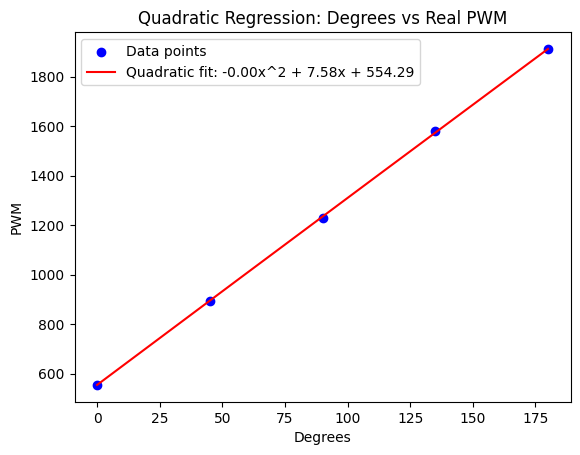

In [31]:
# Data: Degrees and corresponding real PWM values
degrees = np.array([0, 45, 90, 135, 180])  # x values (degree)

# Perform quadratic regression (degree 2 polynomial)
coefficients = np.polyfit(degrees, real_pwm, 2)

# Coefficients: a, b, c (for ax^2 + bx + c)
a, b, c = coefficients

# Output the coefficients
print(f"Quadratic equation coefficients: a = {a}, b = {b}, c = {c}")

# Optional: Plotting the fit
plt.scatter(degrees, real_pwm, color='blue', label='Data points')
x_vals = np.linspace(0, 180, 1000)
y_vals = a * x_vals**2 + b * x_vals + c
plt.plot(x_vals, y_vals, color='red', label=f'Quadratic fit: {a:.2f}x^2 + {b:.2f}x + {c:.2f}')
plt.xlabel('Degrees')
plt.ylabel('PWM')
plt.title('Quadratic Regression: Degrees vs Real PWM')
plt.legend()
plt.show()

# Test

In [32]:
# load coefficents
a_SFR = 0.001
b_SFR =7.231
c_SFR = 563.085
coefficients_SFR = np.array([a_SFR, b_SFR, c_SFR])

a_FFR = 0
b_FFR = 7.348
c_FFR = 603.457
coefficients_FFR = np.array([a_FFR, b_FFR, c_FFR])

a_TFR = 0
b_TFR = 7.576
c_TFR = 554.285
coefficients_TFR = np.array([a_TFR, b_TFR, c_TFR])

In [33]:
def deg2PWM(desire_deg_angle, coefficents):
    a, b, c = coefficents
    pulse = round((a * desire_deg_angle**2) + (b * desire_deg_angle) + c, 0)
    return pulse

In [34]:
desire_angles = np.array([90, 90, 180])
desire_PWM_SFR = deg2PWM(desire_angles[0], coefficients_SFR)
desire_PWM_FFR = deg2PWM(desire_angles[1], coefficients_FFR)
desire_PWM_TFR = deg2PWM(desire_angles[2], coefficients_TFR)

print(f"shoulder_angle_FR.writeMicroseconds({desire_PWM_SFR});\n  femur_angle_FR.writeMicroseconds({desire_PWM_FFR});\n  tibia_angle_FR.writeMicroseconds({desire_PWM_TFR}); ")

shoulder_angle_FR.writeMicroseconds(1222.0);
  femur_angle_FR.writeMicroseconds(1265.0);
  tibia_angle_FR.writeMicroseconds(1918.0); 
